Create `spark` context, e.g. using wmfpython or script

In [15]:
%run ~/interactive/spark.py

In [3]:

run_id = "20230428T033034"

cm = spark.read.parquet(f"/tmp/research/knowledge_gaps/{run_id}/metrics_denormalized").cache()
cmg = spark.read.parquet(f"/tmp/research/knowledge_gaps/{run_id}/metrics_global").cache()


23/04/28 17:18:12 WARN YarnScheduler: Initial job has not accepted any resources; check your cluster UI to ensure that workers are registered and have sufficient resources


In [15]:
categories = [r.category for r in (cmg
    .where("content_gap='geography_wmf_region'")
    .select("category")
    .distinct()
).collect()]

# Global standard quality (i.e. across all wikis)

- Percentage of articles by region who meet the shared quality threshold, for all wikipedias, snapshot 03-2023
- Percentage of articles by region who meet the shared quality threshold, for all wikipedias, snapshot 03-2022




In [6]:
pp = (cmg.where("content_gap='geography_wmf_region'")        
    .where(F.col("time_bucket").isin(["2023-03","2022-03"]))        
    .orderBy("category","time_bucket")
    .select("category", "time_bucket", "global.*")    
    .select("category", "time_bucket", "standard_quality","standard_quality_count")
    .toPandas()
)
pp

category time_bucket  standard_quality  \
0   Central & Eastern Europe & Central Asia     2022-03          0.049717   
1   Central & Eastern Europe & Central Asia     2023-03          0.052099   
2           East, Southeast Asia, & Pacific     2022-03          0.079936   
3           East, Southeast Asia, & Pacific     2023-03          0.085225   
4                 Latin America & Caribbean     2022-03          0.039108   
5                 Latin America & Caribbean     2023-03          0.041089   
6                Middle East & North Africa     2022-03          0.044734   
7                Middle East & North Africa     2023-03          0.047560   
8                             North America     2022-03          0.063641   
9                             North America     2023-03          0.066253   
10                Northern & Western Europe     2022-03          0.086449   
11                Northern & Western Europe     2023-03          0.087887   
12                               South Asia     2022-03          0.068048   
13                               South Asia     2023-03          0.070615   
14                       Sub-Saharan Africa     2022-03          0.038833   
15                       Sub-Saharan Africa     2023-03          0.041532   
16                                UNCLASSED     2022-03          0.009077   
17                                UNCLASSED     2023-03          0.009844   

    standard_quality_count  
0                   214435  
1                   234998  
2                   141690  
3                   154546  
4                    54987  
5                    58343  
6                    40023  
7                    43273  
8                   163947  
9                   175252  
10                  489579  
11                  518165  
12                   37898  
13                   41201  
14                   24269  
15                   26377  
16                     247  
17                     270

<AxesSubplot: title={'center': 'number of articles meeting standard quality conditions'}, xlabel='category'>

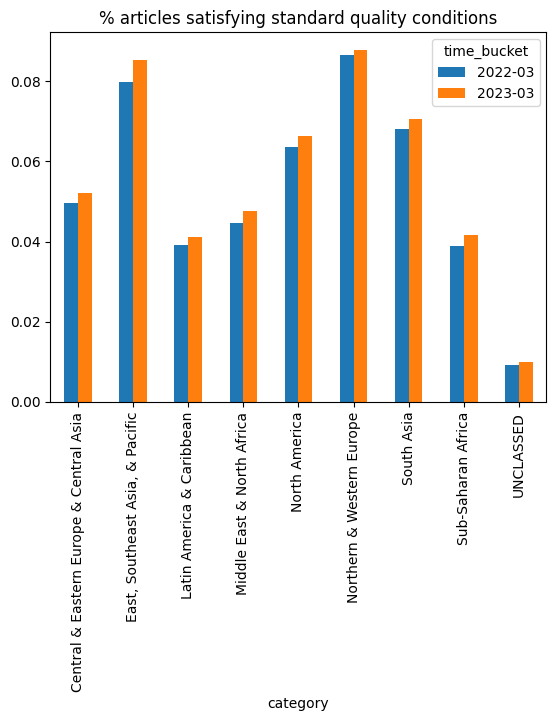

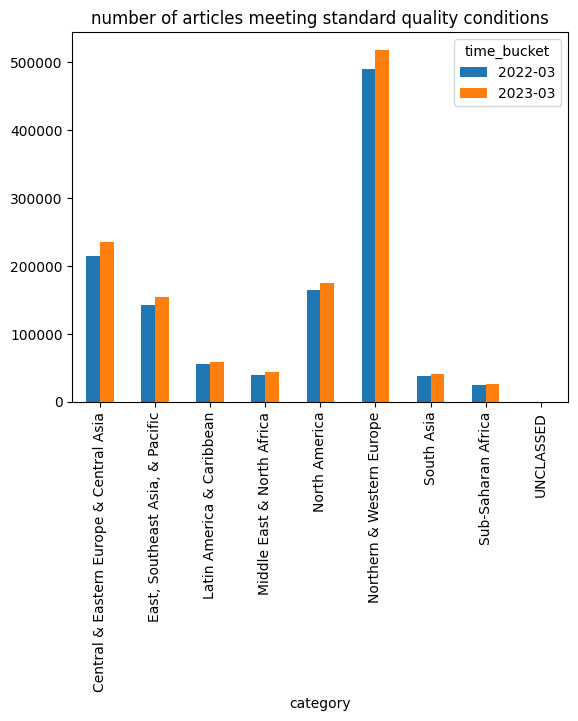

In [29]:
pp.pivot(index="category",columns='time_bucket',values='standard_quality').plot.bar(title="% articles satisfying standard quality conditions")
pp.pivot(index="category",columns='time_bucket',values='standard_quality_count').plot.bar(title="number of articles meeting standard quality conditions")


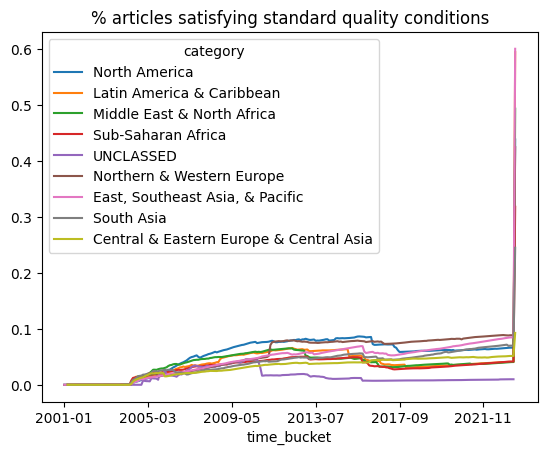

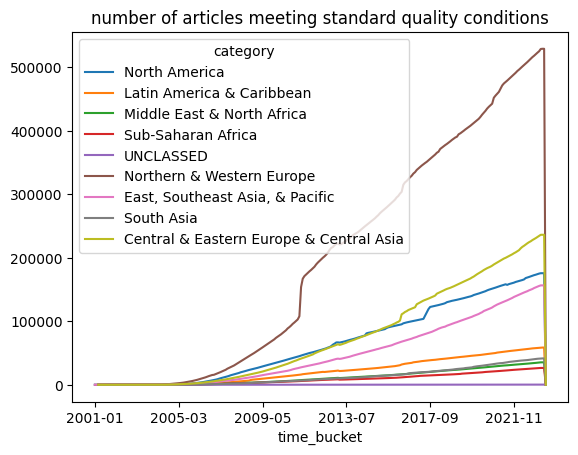

In [17]:
pplot = (cmg.where("content_gap='geography_wmf_region'")        
    .where("time_bucket!='2023-04'")        
    .orderBy("category","time_bucket")
    .select("category", "time_bucket", "global.*")    
    .select("category", "time_bucket", "standard_quality","standard_quality_count")
    .toPandas()
)
pplot.pivot(index="time_bucket",columns='category',values='standard_quality').plot(y=categories,title="% articles satisfying standard quality conditions")
_ = pplot.pivot(index="time_bucket",columns='category',values='standard_quality_count').plot(y=categories,title="number of articles meeting standard quality conditions")



## enwiki only

For comparison, the values for English wikipedia only

In [22]:
en = (cm.where("wiki_db='enwiki' and content_gap='geography_wmf_region'")
    .where(F.col("time_bucket").isin(["2023-03","2022-03"]))        
    .orderBy("category","time_bucket")
    .select("category", "time_bucket", "by_category.*")        
    .select("category", "time_bucket", "standard_quality","standard_quality_count")
    .toPandas()
)

en

category time_bucket  standard_quality  \
0   Central & Eastern Europe & Central Asia     2022-03          0.071555   
1   Central & Eastern Europe & Central Asia     2023-03          0.076742   
2           East, Southeast Asia, & Pacific     2022-03          0.239217   
3           East, Southeast Asia, & Pacific     2023-03          0.253840   
4                 Latin America & Caribbean     2022-03          0.135544   
5                 Latin America & Caribbean     2023-03          0.141067   
6                Middle East & North Africa     2022-03          0.090967   
7                Middle East & North Africa     2023-03          0.096369   
8                             North America     2022-03          0.254704   
9                             North America     2023-03          0.263834   
10                Northern & Western Europe     2022-03          0.203912   
11                Northern & Western Europe     2023-03          0.213664   
12                               South Asia     2022-03          0.190532   
13                               South Asia     2023-03          0.202709   
14                       Sub-Saharan Africa     2022-03          0.135906   
15                       Sub-Saharan Africa     2023-03          0.142565   
16                                UNCLASSED     2022-03          0.015287   
17                                UNCLASSED     2023-03          0.015814   

    standard_quality_count  
0                    16688  
1                    18406  
2                    33758  
3                    36691  
4                     8812  
5                     9256  
6                     7246  
7                     7731  
8                    92500  
9                    96596  
10                   64940  
11                   68777  
12                   15685  
13                   16854  
14                    6229  
15                    6615  
16                      58  
17                      60

<AxesSubplot: title={'center': 'number of articles meeting standard quality conditions'}, xlabel='category'>

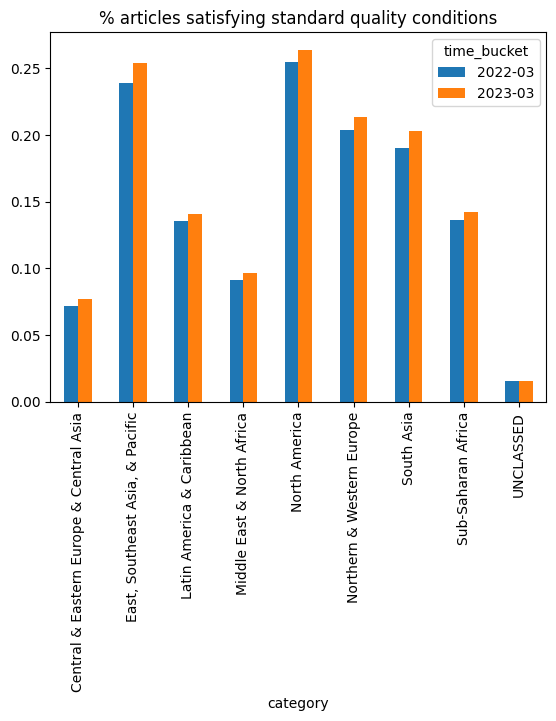

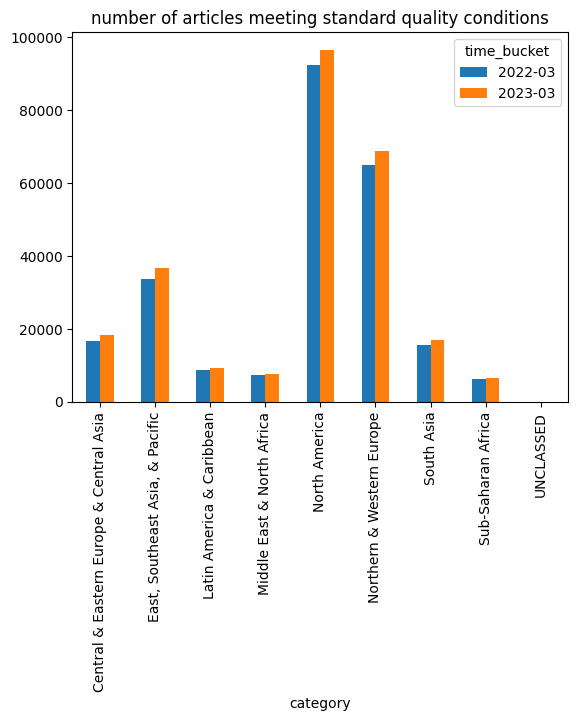

In [27]:
en.pivot(index="category",columns='time_bucket',values='standard_quality').plot.bar(title="% articles satisfying standard quality conditions")
en.pivot(index="category",columns='time_bucket',values='standard_quality_count').plot.bar(title="number of articles meeting standard quality conditions")


<AxesSubplot: title={'center': 'number of articles meeting standard quality conditions'}, xlabel='time_bucket'>

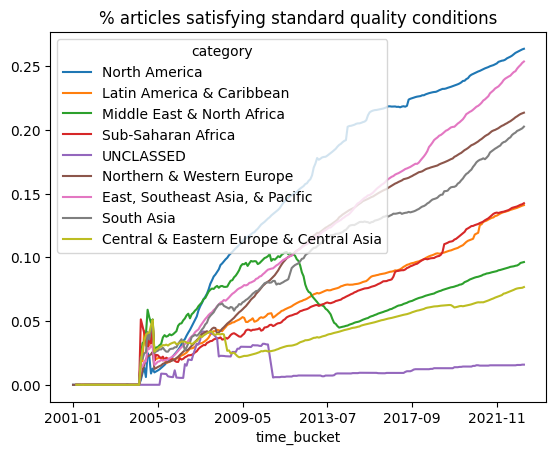

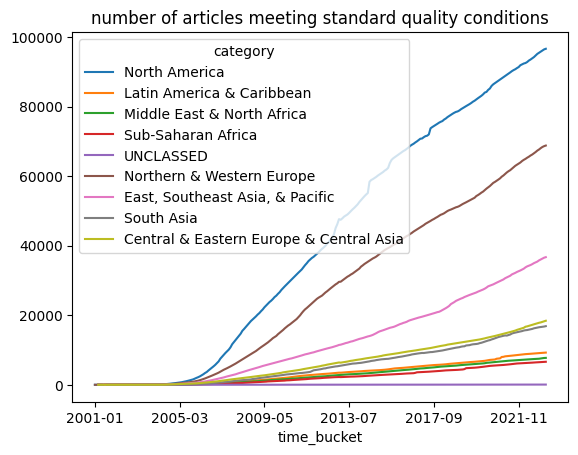

In [36]:
pplot = (cm.where("wiki_db='enwiki' and content_gap='geography_wmf_region'")
    .where("time_bucket!='2023-04'")        
    .orderBy("category","time_bucket")
    .select("category", "time_bucket", "by_category.*")    
    .select("category", "time_bucket", "standard_quality","standard_quality_count")
    .toPandas()
)
pplot.pivot(index="time_bucket",columns='category',values='standard_quality').plot(y=categories,title="% articles satisfying standard quality conditions")
pplot.pivot(index="time_bucket",columns='category',values='standard_quality_count').plot(y=categories,title="number of articles meeting standard quality conditions")



## Manual run of standard quality metrics for wmg_region content gap


In [50]:
geodata = (spark.read
    .parquet("standar_quality_manual/metrics1")
    .orderBy("category","time_bucket")            
    .toPandas()
)     

geodata              

category time_bucket  \
0     Central & Eastern Europe & Central Asia     2001-03   
1     Central & Eastern Europe & Central Asia     2001-04   
2     Central & Eastern Europe & Central Asia     2001-05   
3     Central & Eastern Europe & Central Asia     2001-06   
4     Central & Eastern Europe & Central Asia     2001-07   
...                                       ...         ...   
2390                                UNCLASSED     2023-02   
2391                                UNCLASSED     2023-03   
2392                                UNCLASSED     2023-04   
2393                                UNCLASSED     2023-05   
2394                                UNCLASSED     2023-06   

      standard_quality_count  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
2390                     270  
2391                     270  
2392                     270  
2393                     270  
2394                     270  

[2395 rows x 3 columns]

category time_bucket  \
267   Central & Eastern Europe & Central Asia     2023-06   
536           East, Southeast Asia, & Pacific     2023-06   
804                 Latin America & Caribbean     2023-06   
1071               Middle East & North Africa     2023-06   
1341                            North America     2023-06   
1611                Northern & Western Europe     2023-06   
1878                               South Asia     2023-06   
2146                       Sub-Saharan Africa     2023-06   
2394                                UNCLASSED     2023-06   

      standard_quality_count  
267                   239573  
536                   158980  
804                    59231  
1071                   35944  
1341                  177288  
1611                  541987  
1878                   42329  
2146                   27102  
2394                     270

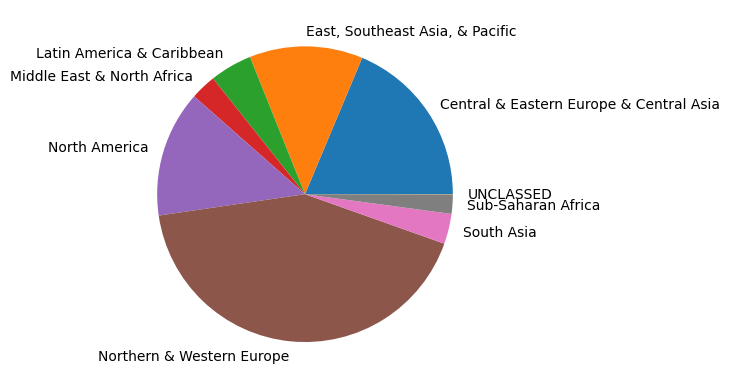

In [54]:
c = geodata[geodata['time_bucket']=='2023-06']
plt.pie(c['standard_quality_count'], labels = c['category'])
c

In [77]:

qualities = geodata.pivot(index="time_bucket",columns="category",values="standard_quality_count")
qualities

category     Central & Eastern Europe & Central Asia  \
time_bucket                                            
2001-01                                          NaN   
2001-02                                          NaN   
2001-03                                          0.0   
2001-04                                          0.0   
2001-05                                          0.0   
...                                              ...   
2023-02                                     234193.0   
2023-03                                     236032.0   
2023-04                                     236966.0   
2023-05                                     238517.0   
2023-06                                     239573.0   

category     East, Southeast Asia, & Pacific  Latin America & Caribbean  \
time_bucket                                                               
2001-01                                  0.0                        NaN   
2001-02                                  NaN                        NaN   
2001-03                                  0.0                        0.0   
2001-04                                  0.0                        0.0   
2001-05                                  0.0                        0.0   
...                                      ...                        ...   
2023-02                             155584.0                    58285.0   
2023-03                             156448.0                    58578.0   
2023-04                             157340.0                    58862.0   
2023-05                             158246.0                    59063.0   
2023-06                             158980.0                    59231.0   

category     Middle East & North Africa  North America  \
time_bucket                                              
2001-01                             NaN            0.0   
2001-02                             NaN            0.0   
2001-03                             0.0            0.0   
2001-04                             0.0            0.0   
2001-05                             0.0            0.0   
...                                 ...            ...   
2023-02                         35036.0       175031.0   
2023-03                         35322.0       175621.0   
2023-04                         35548.0       176200.0   
2023-05                         35793.0       176858.0   
2023-06                         35944.0       177288.0   

category     Northern & Western Europe  South Asia  Sub-Saharan Africa  \
time_bucket                                                              
2001-01                            0.0         NaN                 NaN   
2001-02                            0.0         NaN                 NaN   
2001-03                            0.0         0.0                 0.0   
2001-04                            0.0         0.0                 0.0   
2001-05                            0.0         0.0                 0.0   
...                                ...         ...                 ...   
2023-02                       524990.0     41162.0             26303.0   
2023-03                       527981.0     41488.0             26495.0   
2023-04                       537194.0     41712.0             26686.0   
2023-05                       540325.0     42151.0             26930.0   
2023-06                       541987.0     42329.0             27102.0   

category     UNCLASSED  
time_bucket             
2001-01            NaN  
2001-02            NaN  
2001-03            NaN  
2001-04            NaN  
2001-05            NaN  
...                ...  
2023-02          270.0  
2023-03          270.0  
2023-04          270.0  
2023-05          270.0  
2023-06          270.0  

[270 rows x 9 columns]

In [78]:
qualities.to_csv('qualities_geo.csv')

In [79]:
qualities.rolling(window=3).mean().diff(11).to_csv('qualities_diff_geo.csv')